In [1]:
import cv2
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import os.path as ops
from collections import Iterable

from PIL import Image

# Path

In [2]:
image_dir = 'bdd100k/images/100k/train/'
label_paths = 'bdd100k/labels/bdd100k_labels_images_train_highway_lane.json'

save_image_path = 'bdd100k/images/100k_train_drivable/gt_image_jpg/'
save_binary_path = 'bdd100k/images/100k_train_drivable/gt_binary_image_jpg/'
save_combine_path = 'bdd100k/images/100k_train_drivable/gt_combine_image_jpg/'

In [3]:
# image_dir = 'bdd100k/images/100k/val/'
# label_paths = 'bdd100k/labels/bdd100k_labels_images_val_highway_night.json'

# save_image_path = 'bdd100k/images/100k_val/gt_image_jpg/'
# save_binary_path = 'bdd100k/images/100k_val/gt_binary_image_jpg/'

In [4]:
if not ops.exists(save_image_path):
    os.makedirs(save_image_path)
if not ops.exists(save_binary_path):
    os.makedirs(save_binary_path)
if not ops.exists(save_combine_path):
    os.makedirs(save_combine_path)

# Generate binary image

In [5]:
def read_labels(label_path):
    labels = json.load(open(label_path, 'r'))
    if not isinstance(labels, Iterable):
        labels = [labels]
    return labels

In [6]:
label = read_labels(label_paths)

In [7]:
def get_areas(objects):
    return [o for o in objects
            if 'poly2d' in o and o['category'] == 'drivable area']

In [8]:
def draw_drivable(dst, frame, color=(255,0,0)):
    objects = frame['labels']
    objects = get_areas(objects)
    
    moves = {'L': Path.LINETO, 'C': Path.CURVE4}
    
    for obj in objects:
        for poly in obj['poly2d']:
            if obj['attributes']['areaType'] == 'direct':                                
                points = [v for v in poly['vertices']]
                
                area_pts = np.array([points], np.int64)
                cv2.fillPoly(dst, area_pts, color=color)
                
                codes = [moves[t] for t in poly['types']]
                codes[0] = Path.MOVETO
                area_pts = np.array([codes], np.int64)
                print(area_pts)
#                 cv2.fillPoly(dst, area_pts, color=color)
    return dst

In [9]:
start_number = 0

# for i in range(len(label)):
for i in range(10):
    frame = label[i]
    image_path = image_dir + frame['name']
    img = mpimg.imread(image_path)
    img_area = np.array(img, dtype=np.uint8)
    
    # img + lane
    img_area = draw_drivable(img_area, frame)
    
    # binary lane imnage
    dst_binary_image = np.zeros([img.shape[0], img.shape[1]], np.uint8)
    dst_binary_image = draw_drivable(dst_binary_image, frame, color=255)

    # save binary
    save_name = '{:04d}.jpg'.format(i+start_number)
    save_path = save_binary_path + save_name
    cv2.imwrite(save_path, dst_binary_image)

    # save image
    save_name = '{:04d}.jpg'.format(i+start_number)
    save_path = save_image_path + save_name
    cv2.imwrite(save_path, img[:, :, (2, 1, 0)])

    # save image
    save_name = '{:04d}.jpg'.format(i+start_number)
    save_path = save_combine_path + save_name
    cv2.imwrite(save_path, img_area[:, :, (2, 1, 0)])    
    

[[1 4 4 4 2 4 4 4 4 4 4]]
[[1 4 4 4 2 4 4 4 4 4 4]]
[[1 4 4 4 2 2 2]]
[[1 4 4 4 2 2 2]]
[[1 2 2 2 4 4 4]]
[[1 2 2 2 4 4 4]]
[[1 4 4 4 2 2 4 4 4 4 4 4 2]]
[[1 4 4 4 2 2 4 4 4 4 4 4 2]]
[[1 2 2 4 4 4 2]]
[[1 2 2 4 4 4 2]]
[[1 2 2 4 4 4 2]]
[[1 2 2 4 4 4 2]]
[[1 4 4 4 4 4 4 2 2 2 2 2 4 4 4]]
[[1 4 4 4 4 4 4 2 2 2 2 2 4 4 4]]
[[1 2 2 4 4 4 2]]
[[1 2 2 4 4 4 2]]
[[1 2 4 4 4 2 2]]
[[1 2 4 4 4 2 2]]
[[1 2 2 2 2 2 2 4 4 4]]
[[1 2 2 2 2 2 2 4 4 4]]


# Check

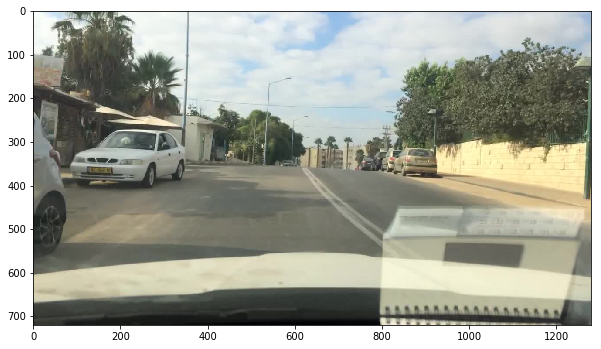

In [10]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img)

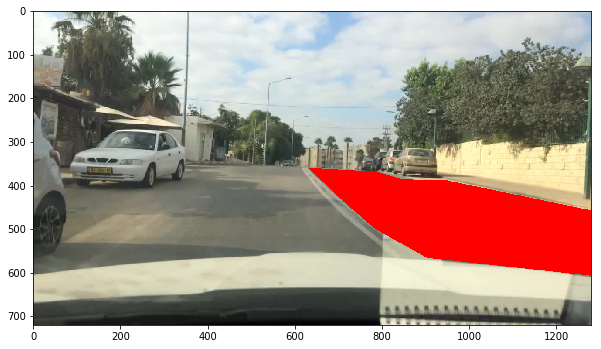

In [11]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(img_area)

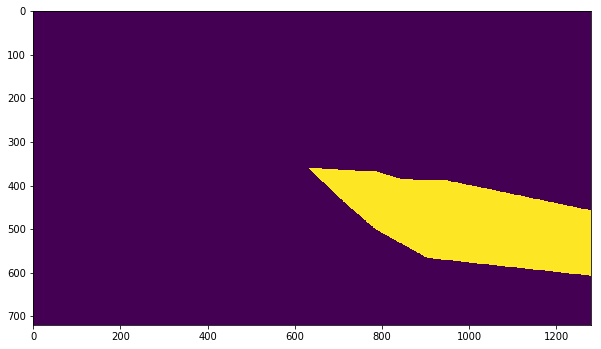

In [12]:
fig = plt.figure(figsize=(10,10))
plt.plot()
plt.imshow(dst_binary_image)